# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    idx_y_pos = [i for i in range(Y_train.shape[0]) if Y_train[i] == 1]
    idx_y_neg = [i for i in range(Y_train.shape[0]) if Y_train[i] == -1]
    
    mean_pos = np.sum(X_train[idx_y_pos],0)/len(idx_y_pos)
    mean_neg = np.sum(X_train[idx_y_neg], 0)/len(idx_y_neg)
    
    covariance = np.eye(mean_pos.shape[0])
    
    PY_pos = len(idx_y_pos)/(len(idx_y_pos) + len(idx_y_neg))
    PY_neg = 1 - PY_pos
    
    Y_test_pred = []
    
    for i in range(X_test.shape[0]):
        test_pos = (((X_test[i] - mean_pos) @ np.linalg.inv(covariance)) @ (X_test[i] - mean_pos)[np.newaxis].T)
        test_neg = (((X_test[i] - mean_neg) @ np.linalg.inv(covariance)) @ (X_test[i] - mean_neg)[np.newaxis].T)
    
        Eta = 1/(1 + (PY_neg/PY_pos)*np.exp((test_pos - test_neg)/2))
        
        if Eta >= 1/2:
            Eta = 1
        else:
            Eta = -1
        Y_test_pred.append(Eta)
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    idx_y_pos = [i for i in range(Y_train.shape[0]) if Y_train[i] == 1]
    idx_y_neg = [i for i in range(Y_train.shape[0]) if Y_train[i] == -1]
    
    mean_pos = np.sum(X_train[idx_y_pos],0)/len(idx_y_pos)
    mean_neg = np.sum(X_train[idx_y_neg], 0)/len(idx_y_neg)
    
    covariance_pos = ((X_train[idx_y_pos] - mean_pos)/len(idx_y_pos)).T @ ((X_train[idx_y_pos] - mean_pos))
    covariance_neg = ((X_train[idx_y_neg] - mean_neg)/len(idx_y_neg)).T @ ((X_train[idx_y_neg] - mean_neg))
    
    covariance =  covariance_pos + covariance_neg
    
    PY_pos = len(idx_y_pos)/(len(idx_y_pos) + len(idx_y_neg))
    PY_neg = 1 - PY_pos
    
    Y_test_pred = []
    
    for i in range(X_test.shape[0]):
        test_pos = (((X_test[i] - mean_pos) @ np.linalg.inv(covariance)) @ (X_test[i] - mean_pos)[np.newaxis].T)
        test_neg = (((X_test[i] - mean_neg) @ np.linalg.inv(covariance)) @ (X_test[i] - mean_neg)[np.newaxis].T)
    
        Eta = 1/(1 + (PY_neg/PY_pos)*np.exp((test_pos - test_neg)/2))
        
        if Eta >= 1/2:
            Eta = 1
        else:
            Eta = -1
        Y_test_pred.append(Eta)
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    idx_y_pos = [i for i in range(Y_train.shape[0]) if Y_train[i] == 1]
    idx_y_neg = [i for i in range(Y_train.shape[0]) if Y_train[i] == -1]
    
    mean_pos = np.sum(X_train[idx_y_pos],0)/len(idx_y_pos)
    mean_neg = np.sum(X_train[idx_y_neg], 0)/len(idx_y_neg)
    
    covariance_pos = ((X_train[idx_y_pos] - mean_pos)/len(idx_y_pos)).T @ ((X_train[idx_y_pos] - mean_pos))
    covariance_neg = ((X_train[idx_y_neg] - mean_neg)/len(idx_y_neg)).T @ ((X_train[idx_y_neg] - mean_neg))
    
    
    PY_pos = len(idx_y_pos)/(len(idx_y_pos) + len(idx_y_neg))
    PY_neg = 1 - PY_pos
    
    Y_test_pred = []
    
    for i in range(X_test.shape[0]):
        test_pos = (((X_test[i] - mean_pos) @ np.linalg.inv(covariance_pos)) @ (X_test[i] - mean_pos)[np.newaxis].T)
        test_neg = (((X_test[i] - mean_neg) @ np.linalg.inv(covariance_neg)) @ (X_test[i] - mean_neg)[np.newaxis].T)
    
        Eta = 1/(1 + (PY_neg/PY_pos)*np.exp((test_pos - test_neg)/2))
        
        if Eta >= 1/2:
            Eta = 1
        else:
            Eta = -1
        Y_test_pred.append(Eta)
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred

In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


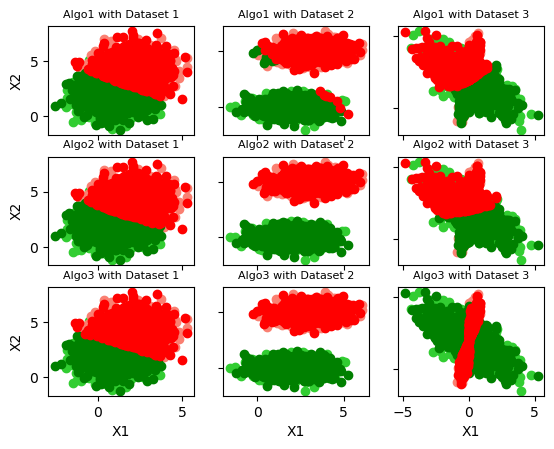

[0.126, 0.0085, 0.497, 0.1245, 0.0, 0.495, 0.1245, 0.0, 0.264]


In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
with np.load('dataset1_1.npz') as data1:
    X_train1 = data1['arr_0']
    X_test1 = data1['arr_2']
    Y_train1 = data1['arr_1']
    Y_test1 = data1['arr_3']
    
with np.load('dataset1_2.npz') as data2:
    X_train2 = data2['arr_0']
    X_test2 = data2['arr_2']
    Y_train2 = data2['arr_1']
    Y_test2 = data2['arr_3']
    
with np.load('dataset1_3.npz') as data3:
    X_train3 = data3['arr_0']
    X_test3 = data3['arr_2']
    Y_train3 = data3['arr_1']
    Y_test3 = data3['arr_3']
    
y_pred1_bayes1a = Bayes1a(X_train1, Y_train1, X_test1)
y_pred2_bayes1a = Bayes1a(X_train2, Y_train2, X_test2)
y_pred3_bayes1a = Bayes1a(X_train3, Y_train3, X_test3)

y_pred1_bayes1b = Bayes1b(X_train1, Y_train1, X_test1)
y_pred2_bayes1b = Bayes1b(X_train2, Y_train2, X_test2)
y_pred3_bayes1b = Bayes1b(X_train3, Y_train3, X_test3)

y_pred1_bayes1c = Bayes1c(X_train1, Y_train1, X_test1)
y_pred2_bayes1c = Bayes1c(X_train2, Y_train2, X_test2)
y_pred3_bayes1c = Bayes1c(X_train3, Y_train3, X_test3)

#Calculating errors
def error(y_true, y_pred):
    error = y_true == y_pred
    return error[error == False].shape[0]/y_true.shape[0]

#Classifier 1
error11 = error(Y_test1, y_pred1_bayes1a)
error12 = error(Y_test2, y_pred2_bayes1a)
error13 = error(Y_test3, y_pred3_bayes1a)

#Classifier 2
error21 = error(Y_test1, y_pred1_bayes1b)
error22 = error(Y_test2, y_pred2_bayes1b)
error23 = error(Y_test3, y_pred3_bayes1b)

#Classifier 3
error31 = error(Y_test1, y_pred1_bayes1c)
error32 = error(Y_test2, y_pred2_bayes1c)
error33 = error(Y_test3, y_pred3_bayes1c)

errors = [error11, error12, error13, error21, error22, error23, error31, error32, error33]

fig, axes = plt.subplots(3,3)
## Algorithm 1
axes[0,0].scatter(X_train1[Y_train1 == 1][:,0],X_train1[Y_train1 == 1][:,1], color='limegreen',label="train 1")
axes[0,0].scatter(X_train1[Y_train1 == -1][:,0], X_train1[Y_train1 == -1][:,1], color='salmon',label="train -1")
axes[0,0].scatter(X_test1[y_pred1_bayes1a == 1][:,0],X_test1[y_pred1_bayes1a == 1][:,1], color='green',label="test 1")
axes[0,0].scatter(X_test1[y_pred1_bayes1a == -1][:,0], X_test1[y_pred1_bayes1a == -1][:,1], color='red', label="test -1")
axes[0,0].set_title("Algo1 with Dataset 1", fontsize=8)

axes[0,1].scatter(X_train2[Y_train2 == 1][:,0],X_train2[Y_train2 == 1][:,1], color='limegreen', label="train 1")
axes[0,1].scatter(X_train2[Y_train2 == -1][:,0], X_train2[Y_train2 == -1][:,1], color='salmon',label="train -1")
axes[0,1].scatter(X_test2[y_pred2_bayes1a == 1][:,0], X_test2[y_pred2_bayes1a == 1][:,1], color='green',label="test 1")
axes[0,1].scatter(X_test2[y_pred2_bayes1a == -1][:,0], X_test2[y_pred2_bayes1a == -1][:,1], color='red', label="test -1")
axes[0,1].set_title("Algo1 with Dataset 2", fontsize=8)

axes[0,2].scatter(X_train3[Y_train3 == 1][:,0],X_train3[Y_train3 == 1][:,1], color='limegreen', label="train 1")
axes[0,2].scatter(X_train3[Y_train3 == -1][:,0], X_train3[Y_train3 == -1][:,1], color='salmon',label="train -1")
axes[0,2].scatter(X_test3[y_pred3_bayes1a == 1][:,0], X_test3[y_pred3_bayes1a == 1][:,1], color='green',label="test 1")
axes[0,2].scatter(X_test3[y_pred3_bayes1a == -1][:,0], X_test3[y_pred3_bayes1a == -1][:,1], color='red', label="test -1")
axes[0,2].set_title("Algo1 with Dataset 3", fontsize=8)

## Algorithm 2
axes[1,0].scatter(X_train1[Y_train1 == 1][:,0],X_train1[Y_train1 == 1][:,1], color='limegreen', label="train 1")
axes[1,0].scatter(X_train1[Y_train1 == -1][:,0], X_train1[Y_train1 == -1][:,1], color='salmon',label="train -1")
axes[1,0].scatter(X_test1[y_pred1_bayes1b == 1][:,0],X_test1[y_pred1_bayes1b == 1][:,1], color='green',label="test 1")
axes[1,0].scatter(X_test1[y_pred1_bayes1b == -1][:,0],X_test1[y_pred1_bayes1b == -1][:,1], color='red', label="test -1")
axes[1,0].set_title("Algo2 with Dataset 1", fontsize=8)

axes[1,1].scatter(X_train2[Y_train2 == 1][:,0],X_train2[Y_train2 == 1][:,1], color='limegreen', label="train 1")
axes[1,1].scatter(X_train2[Y_train2 == -1][:,0], X_train2[Y_train2 == -1][:,1], color='salmon',label="train -1")
axes[1,1].scatter(X_test2[y_pred2_bayes1b == 1][:,0], X_test2[y_pred2_bayes1b == 1][:,1], color='green',label="test 1")
axes[1,1].scatter(X_test2[y_pred2_bayes1b == -1][:,0], X_test2[y_pred2_bayes1b == -1][:,1], color='red', label="test -1")
axes[1,1].set_title("Algo2 with Dataset 2", fontsize=8)

axes[1,2].scatter(X_train3[Y_train3 == 1][:,0],X_train3[Y_train3 == 1][:,1], color='limegreen', label="train 1")
axes[1,2].scatter(X_train3[Y_train3 == -1][:,0], X_train3[Y_train3 == -1][:,1], color='salmon',label="train -1")
axes[1,2].scatter(X_test3[y_pred3_bayes1b == 1][:,0], X_test3[y_pred3_bayes1b == 1][:,1], color='green',label="test 1")
axes[1,2].scatter(X_test3[y_pred3_bayes1b == -1][:,0],X_test3[y_pred3_bayes1b == -1][:,1], color='red', label="test -1")
axes[1,2].set_title("Algo2 with Dataset 3", fontsize=8)

## Algorithm 3
axes[2,0].scatter(X_train1[Y_train1 == 1][:,0],X_train1[Y_train1 == 1][:,1], color='limegreen', label="train 1")
axes[2,0].scatter(X_train1[Y_train1 == -1][:,0], X_train1[Y_train1 == -1][:,1], color='salmon',label="train -1")
axes[2,0].scatter(X_test1[y_pred1_bayes1c == 1][:,0], X_test1[y_pred1_bayes1c == 1][:,1], color='green',label="test 1")
axes[2,0].scatter(X_test1[y_pred1_bayes1c == -1][:, 0],X_test1[y_pred1_bayes1c == -1][:, 1], color='red', label="test -1")
axes[2,0].set_title("Algo3 with Dataset 1", fontsize=8)

axes[2,1].scatter(X_train2[Y_train2 == 1][:,0],X_train2[Y_train2 == 1][:,1], color='limegreen', label="train 1")
axes[2,1].scatter(X_train2[Y_train2 == -1][:,0], X_train2[Y_train2 == -1][:,1], color='salmon',label="train -1")
axes[2,1].scatter(X_test2[y_pred2_bayes1c == 1][:,0], X_test2[y_pred2_bayes1c == 1][:,1], color='green',label="test 1")
axes[2,1].scatter(X_test2[y_pred2_bayes1c == -1][:,0], X_test2[y_pred2_bayes1c == -1][:,1], color='red', label="test -1")
axes[2,1].set_title("Algo3 with Dataset 2",fontsize=8)

axes[2,2].scatter(X_train3[Y_train3 == 1][:,0],X_train3[Y_train3 == 1][:,1], color='limegreen', label="train 1")
axes[2,2].scatter(X_train3[Y_train3 == -1][:,0], X_train3[Y_train3 == -1][:,1], color='salmon',label="train -1")
axes[2,2].scatter(X_test3[y_pred3_bayes1c == 1][:,0], X_test3[y_pred3_bayes1c == 1][:,1], color='green',label="test 1")
axes[2,2].scatter(X_test3[y_pred3_bayes1c == -1][:,0], X_test3[y_pred3_bayes1c == -1][:,1], color='red', label="test -1")
axes[2,2].set_title("Algo3 with Dataset 3",fontsize=8)

for ax in axes.flat:
    ax.set(xlabel='X1', ylabel='X2')
for ax in axes.flat:
    ax.label_outer()

plt.show()
print(errors)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
## Observation:
* From the zero one loss calculated for all three classifiers its evident that Classifier 3 classifies more accurately then the rest.
* Classifier 3 considers covariance for each class separately, so it captures the distribution more accurately so we get a more accurate prediction.
* Classifier 2 considers covariance for the whole dataset at once, which captures less about the distribution so we get a less accurate prediciton.
* Classifier 1 assumes to Identity matrix as covariance matrix, which captures very little and gives a further less accurate predictions.

## Zero one loss for the Classifiers
| Classifiers/ Datasets| Classifier 1 | Classifier 2 | Classifier3|
|:-------:|:--------:|:--------:|:----------:|
| **Dataset 1**| 0.126|0.1245|0.1245|
| **Dataset 2**|0.0085|0.0|0.0|
|**Dataset 3**|0.497|0.495|0.264|


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell
def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    L = np.array(
    [[0, 1, 2, 3],
     [1, 0, 1, 2],
     [2, 1, 0, 1],
     [3, 2, 1, 0]])
    
    idx_y_1 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 1]
    idx_y_2 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 2]
    idx_y_3 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 3]
    idx_y_4 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 4]
    
    mean_1 = np.mean(X_train[Y_train == 1], 0)
    mean_2 = np.mean(X_train[Y_train == 2], 0)
    mean_3 = np.mean(X_train[Y_train == 3], 0)
    mean_4 = np.mean(X_train[Y_train == 4], 0)
    mean = [mean_1, mean_2, mean_3, mean_4]
    
    covariance = np.eye(mean_1.shape[0])
    
    PY1 = len(idx_y_1)/Y_train.shape[0]
    PY2 = len(idx_y_2)/Y_train.shape[0]
    PY3 = len(idx_y_3)/Y_train.shape[0]
    PY4 = len(idx_y_4)/Y_train.shape[0]
    PY = np.array([PY1, PY2, PY3, PY4])
    
    Y_test_pred = []
    
    for i in range(X_test.shape[0]):
        Eta = []
        test_poss = []
        x_test = X_test[i]
        for j in range(4):
            test_pos = np.exp(-(((x_test - mean[j]) @ np.linalg.inv(covariance)) @ (x_test - mean[j])[np.newaxis].T)/2)
            test_poss.append(test_pos)
        test_poss = np.array(test_poss)
        
        for j in range(4):
            Eta.append(PY[j]*test_poss[j]/(PY@ test_poss))
        Eta = np.array(Eta)
        Y_test_pred.append(np.argmin((Eta.T @ L)) + 1)
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array(
    [[0, 1, 2, 3],
     [1, 0, 1, 2],
     [2, 1, 0, 1],
     [3, 2, 1, 0]])
    
    idx_y_1 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 1]
    idx_y_2 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 2]
    idx_y_3 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 3]
    idx_y_4 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 4]
    
    mean_1 = np.mean(X_train[Y_train == 1], 0)
    mean_2 = np.mean(X_train[Y_train == 2], 0)
    mean_3 = np.mean(X_train[Y_train == 3], 0)
    mean_4 = np.mean(X_train[Y_train == 4], 0)
    mean = [mean_1, mean_2, mean_3, mean_4]
    
    covariance_1 = ((X_train[Y_train == 1] - mean_1).T @ (X_train[Y_train == 1] - mean_1))/len(idx_y_1)
    covariance_2 = ((X_train[Y_train == 2] - mean_2).T @ (X_train[Y_train == 2] - mean_2))/len(idx_y_2)
    covariance_3 = ((X_train[Y_train == 3] - mean_3).T @ (X_train[Y_train == 3] - mean_3))/len(idx_y_3)
    covariance_4 = ((X_train[Y_train == 4] - mean_4).T @ (X_train[Y_train == 4] - mean_4))/len(idx_y_4)
    
    covariance = covariance_1 + covariance_2 + covariance_3 + covariance_4
    
    PY1 = len(idx_y_1)/Y_train.shape[0]
    PY2 = len(idx_y_2)/Y_train.shape[0]
    PY3 = len(idx_y_3)/Y_train.shape[0]
    PY4 = len(idx_y_4)/Y_train.shape[0]
    PY = np.array([PY1, PY2, PY3, PY4])
    
    Y_test_pred = []
    
    for i in range(X_test.shape[0]):
        Eta = []
        test_poss = []
        x_test = X_test[i]
        for j in range(4):
            test_pos = np.exp(-(((x_test - mean[j]) @ np.linalg.inv(covariance)) @ (x_test - mean[j])[np.newaxis].T)/2)
            test_poss.append(test_pos)
        test_poss = np.array(test_poss)
        
        for j in range(4):
            Eta.append(PY[j]*test_poss[j]/(PY@ test_poss))
        Eta = np.array(Eta)
        Y_test_pred.append(np.argmin((Eta.T @ L)) + 1)
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array(
    [[0, 1, 2, 3],
     [1, 0, 1, 2],
     [2, 1, 0, 1],
     [3, 2, 1, 0]])

    idx_y_1 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 1]
    idx_y_2 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 2]
    idx_y_3 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 3]
    idx_y_4 = [i for i in range(Y_train.shape[0]) if Y_train[i] == 4]
    
    mean_1 = np.mean(X_train[Y_train == 1], 0)
    mean_2 = np.mean(X_train[Y_train == 2], 0)
    mean_3 = np.mean(X_train[Y_train == 3], 0)
    mean_4 = np.mean(X_train[Y_train == 4], 0)
    mean = [mean_1, mean_2, mean_3, mean_4]
    
    covariance_1 = ((X_train[Y_train == 1] - mean_1).T @ (X_train[Y_train == 1] - mean_1))/len(idx_y_1)
    covariance_2 = ((X_train[Y_train == 2] - mean_2).T @ (X_train[Y_train == 2] - mean_2))/len(idx_y_2)
    covariance_3 = ((X_train[Y_train == 3] - mean_3).T @ (X_train[Y_train == 3] - mean_3))/len(idx_y_3)
    covariance_4 = ((X_train[Y_train == 4] - mean_4).T @ (X_train[Y_train == 4] - mean_4))/len(idx_y_4)
    
    covariance = [covariance_1 , covariance_2 , covariance_3 , covariance_4]
    
    PY1 = len(idx_y_1)/Y_train.shape[0]
    PY2 = len(idx_y_2)/Y_train.shape[0]
    PY3 = len(idx_y_3)/Y_train.shape[0]
    PY4 = len(idx_y_4)/Y_train.shape[0]
    PY = np.array([PY1, PY2, PY3, PY4])
    
    Y_test_pred = []
    
    for i in range(X_test.shape[0]):
        Eta = []
        test_poss = []
        x_test = X_test[i]
        for j in range(4):
            test_pos = np.exp(-(((x_test - mean[j]) @ np.linalg.inv(covariance[j])) @ (x_test - mean[j])[np.newaxis].T)/2)
            test_poss.append(test_pos)
        test_poss = np.array(test_poss)
        
        for j in range(4):
            Eta.append(PY[j]*test_poss[j]/(PY@ test_poss))
        Eta = np.array(Eta)
        Y_test_pred.append(np.argmin((Eta.T @ L)) + 1)
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


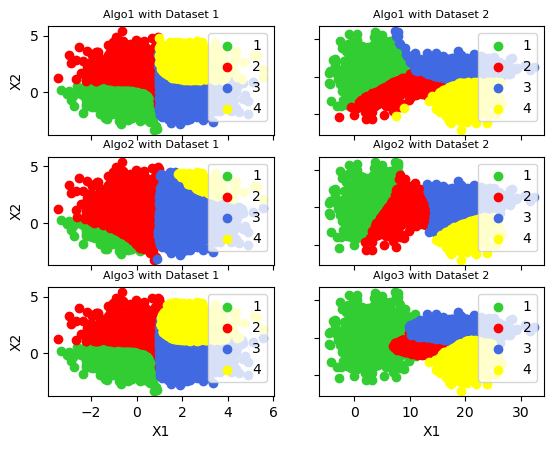

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
L = np.array(
    [[0, 1, 2, 3],
     [1, 0, 1, 2],
     [2, 1, 0, 1],
     [3, 2, 1, 0]])

with np.load('dataset2_1.npz') as data21:
    X_train21 = data21['arr_0']
    X_test21 = data21['arr_2']
    Y_train21 = data21['arr_1']
    Y_test21 = data21['arr_3']
    
with np.load('dataset2_2.npz') as data22:
    X_train22 = data22['arr_0']
    X_test22 = data22['arr_2']
    Y_train22 = data22['arr_1']
    Y_test22 = data22['arr_3']
    
y_pred1_bayes2a = Bayes2a(X_train21, Y_train21, X_test21)
y_pred2_bayes2a = Bayes2a(X_train22, Y_train22, X_test22)

y_pred1_bayes2b = Bayes2b(X_train21, Y_train21, X_test21)
y_pred2_bayes2b = Bayes2b(X_train22, Y_train22, X_test22)

y_pred1_bayes2c = Bayes2c(X_train21, Y_train21, X_test21)
y_pred2_bayes2c = Bayes2c(X_train22, Y_train22, X_test22)

fig, axes = plt.subplots(3,2)
## Algorithm 1
axes[0,0].scatter(X_test21[y_pred1_bayes2a == 1][:,0],X_test21[y_pred1_bayes2a == 1][:,1], color='limegreen', label="1")
axes[0,0].scatter(X_test21[y_pred1_bayes2a == 2][:,0], X_test21[y_pred1_bayes2a == 2][:,1], color='red',label="2")
axes[0,0].scatter(X_test21[y_pred1_bayes2a == 3][:,0], X_test21[y_pred1_bayes2a == 3][:,1], color='royalblue', label="3")
axes[0,0].scatter(X_test21[y_pred1_bayes2a == 4][:,0], X_test21[y_pred1_bayes2a == 4][:,1], color='yellow',label="4")
axes[0,0].set_title("Algo1 with Dataset 1", fontsize=8)
axes[0,0].legend(loc="best")

axes[0,1].scatter(X_test22[y_pred2_bayes2a == 1][:,0], X_test22[y_pred2_bayes2a == 1][:,1], color='limegreen',label="1")
axes[0,1].scatter(X_test22[y_pred2_bayes2a == 2][:,0], X_test22[y_pred2_bayes2a == 2][:,1], color='red',label="2")
axes[0,1].scatter(X_test22[y_pred2_bayes2a == 3][:,0], X_test22[y_pred2_bayes2a == 3][:,1], color='royalblue',label="3")
axes[0,1].scatter(X_test22[y_pred2_bayes2a == 4][:,0], X_test22[y_pred2_bayes2a == 4][:,1], color='yellow',label="4")
axes[0,1].set_title("Algo1 with Dataset 2", fontsize=8)
axes[0,1].legend(loc="best")

## Algorithm 2
axes[1,0].scatter(X_test21[y_pred1_bayes2b == 1][:,0],X_test21[y_pred1_bayes2b == 1][:,1], color='limegreen',label="1")
axes[1,0].scatter(X_test21[y_pred1_bayes2b == 2][:,0],X_test21[y_pred1_bayes2b == 2][:,1], color='red',label="2")
axes[1,0].scatter(X_test21[y_pred1_bayes2b == 3][:,0],X_test21[y_pred1_bayes2b == 3][:,1], color='royalblue',label="3")
axes[1,0].scatter(X_test21[y_pred1_bayes2b == 4][:,0],X_test21[y_pred1_bayes2b == 4][:,1], color='yellow',label="4")
axes[1,0].set_title("Algo2 with Dataset 1", fontsize=8)
axes[1,0].legend(loc="best")

axes[1,1].scatter(X_test22[y_pred2_bayes2b == 1][:,0], X_test22[y_pred2_bayes2b == 1][:,1], color='limegreen',label="1")
axes[1,1].scatter(X_test22[y_pred2_bayes2b == 2][:,0], X_test22[y_pred2_bayes2b == 2][:,1], color='red',label="2")
axes[1,1].scatter(X_test22[y_pred2_bayes2b == 3][:,0], X_test22[y_pred2_bayes2b == 3][:,1], color='royalblue',label="3")
axes[1,1].scatter(X_test22[y_pred2_bayes2b == 4][:,0], X_test22[y_pred2_bayes2b == 4][:,1], color='yellow',label="4")
axes[1,1].set_title("Algo2 with Dataset 2", fontsize=8)
axes[1,1].legend(loc="best")

## Algorithm 3
axes[2,0].scatter(X_test21[y_pred1_bayes2c == 1][:,0], X_test21[y_pred1_bayes2c == 1][:,1], color='limegreen',label="1")
axes[2,0].scatter(X_test21[y_pred1_bayes2c == 2][:, 0],X_test21[y_pred1_bayes2c == 2][:, 1], color='red',label="2")
axes[2,0].scatter(X_test21[y_pred1_bayes2c == 3][:, 0],X_test21[y_pred1_bayes2c == 3][:, 1], color='royalblue',label="3")
axes[2,0].scatter(X_test21[y_pred1_bayes2c == 4][:, 0],X_test21[y_pred1_bayes2c == 4][:, 1], color='yellow',label="4")
axes[2,0].set_title("Algo3 with Dataset 1", fontsize=8)
axes[2,0].legend(loc="best")

axes[2,1].scatter(X_test22[y_pred2_bayes2c == 1][:,0], X_test22[y_pred2_bayes2c == 1][:,1], color='limegreen',label="1")
axes[2,1].scatter(X_test22[y_pred2_bayes2c == 2][:,0], X_test22[y_pred2_bayes2c == 2][:,1], color='red',label="2")
axes[2,1].scatter(X_test22[y_pred2_bayes2c == 3][:,0], X_test22[y_pred2_bayes2c == 3][:,1], color='royalblue',label="3")
axes[2,1].scatter(X_test22[y_pred2_bayes2c == 4][:,0], X_test22[y_pred2_bayes2c == 4][:,1], color='yellow',label="4")
axes[2,1].set_title("Algo3 with Dataset 2",fontsize=8)
axes[2,1].legend(loc="best")

for ax in axes.flat:
    ax.set(xlabel='X1', ylabel='X2')
for ax in axes.flat:
    ax.label_outer()

plt.show()

confusion_mat = np.zeros((4,4))
for i in range(Y_test21.shape[0]):
    if Y_test21[i] == y_pred1_bayes2c[i]:
        confusion_mat[int(Y_test21[i] - 1), int(Y_test21[i] - 1)] += 1
    else:
        confusion_mat[int(y_pred1_bayes2c[i] - 1), int(Y_test21[i] - 1)] += 1

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
## Observation:
* Classifier 3 has the least loss of all the classifier on both the datasets.
* Classifier 3 considers covariance for different classes separately, it captures more about the distribution and provides more accurate predicitons.
* Classifier 2 considers covariance for the whole dataset, it captures less about the distribution and provides a little less accurate predictions.
* Classifier 1 assumes an Identity matrix as covariance for the distribution, which provides further less accurate predicitons. 

## Confusion Matrices:
<table>
<tr><th>Classifier 1 Dataset 1 </th><th>Classifier 2 Dataset 1</th><th>Classifier 3 Dataset 1</th></tr>
<tr><td>
    
|Pred/True|1|2|3|4|
|:----:|:---:|:---:|:---:|:---:|
|**1**|633.0|97.0|86.0|15.0|
|**2**|219.0|738.0|49.0|136.0|
|**3**|136.0|62.0|770.0|194.0|
|**4**|12.|103.0|95.0|655.0|
    
</td><td>

|Pred/True|1|2|3|4|
|:----:|:---:|:---:|:---:|:---:|
|**1**|113.0|3.0|0.0|0.0|
|**2**|745.0|841.0|130.0|157.0|
|**3**|152.0|152.0|868.0|732.0|
|**4**|0.0|4.0|2.0|111.0|
</td>
<td>

|Pred/True|1|2|3|4|
|:----:|:---:|:---:|:---:|:---:|
|**1**|638.0|99.0|89.0|16.0|
|**2**|216.0|746.0.0|47.0|141.0|
|**3**|135.0|58.0|773.0|201.0|
|**4**|11.0|97.0|91.0|642.0|
</td>
</tr> </table>
<table>
<tr><th>Classifier 1 Dataset 2 </th><th>Classifier 2 Dataset 2</th><th>Classifier 3 Dataset 2</th></tr>
<tr><td>
    
|Pred/True|1|2|3|4|
|:----:|:---:|:---:|:---:|:---:|
|**1**|830.0|93.0|30.0|0.0|
|**2**|150.0|784.0|61.0|23.0|
|**3**|18.0|46.0|905.0|78.0|
|**4**|2.0|77.0|4.0|899.0|
    
</td><td>

|Pred/True|1|2|3|4|
|:----:|:---:|:---:|:---:|:---:|
|**1**|736.0|38.0|8.0|0.0|
|**2**|262.0|647.0|154.0|0.0|
|**3**|2.0|309.0|838.0|369.0|
|**4**|0.0|6.0|0.0|631.0|
</td>
<td>

|Pred/True|1|2|3|4|
|:----:|:---:|:---:|:---:|:---:|
|**1**|956.0|144.0|27.0|0.0|
|**2**|32.0|736.0.0|29.0|32.0|
|**3**|12.0|47.0|935.0|52.0|
|**4**|0.0|73.0|9.0|916.0|
</td>
</tr> </table>

## Loss:

|Datasets\Classifers|Classifier 1|Classifier 2|Classifier 3|
|:---:|:---:|:---:|:---:|
|**Dataset 1**|1719.0|2380.0|1717.0|
|**Dataset 2**|734.0|1164.0|601.0|

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




(100, 10000)


<Figure size 640x480 with 0 Axes>

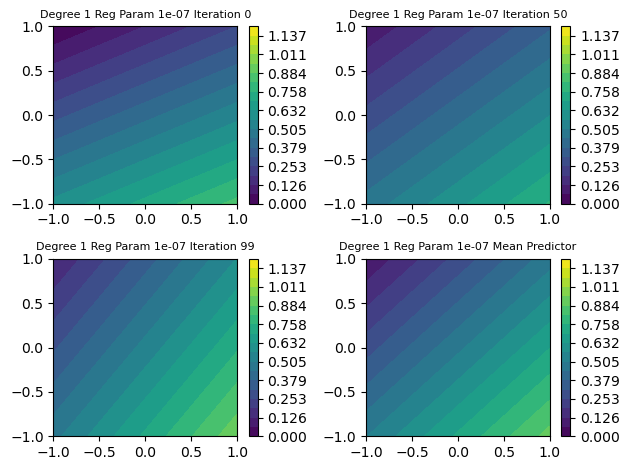

Degree= 1 lambda= 1e-07
Bias = 0.2918111975439697
Variance = 0.03320171589879922
MSE = 0.11835549091084495
(100, 10000)


<Figure size 640x480 with 0 Axes>

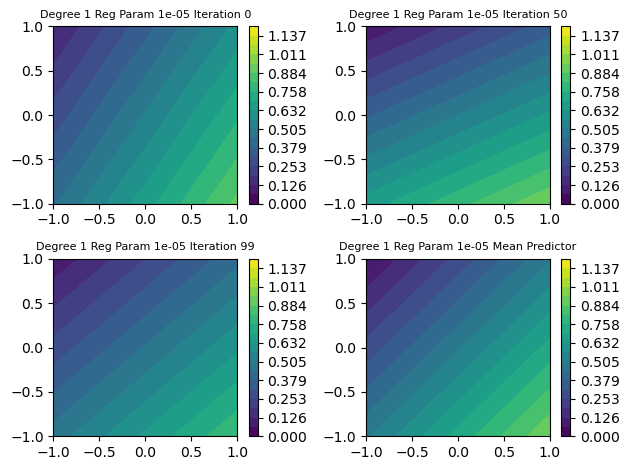

Degree= 1 lambda= 1e-05
Bias = 0.29612436350091015
Variance = 0.036245523630328715
MSE = 0.12393516228914789
(100, 10000)


<Figure size 640x480 with 0 Axes>

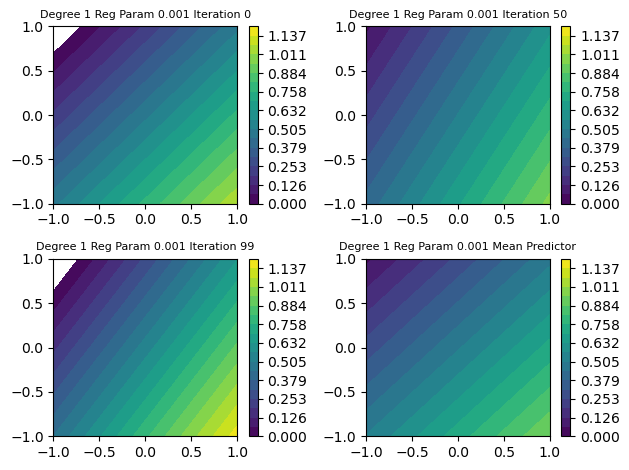

Degree= 1 lambda= 0.001
Bias = 0.2978713657457213
Variance = 0.03718144776615648
MSE = 0.12590879829737778
(100, 10000)


<Figure size 640x480 with 0 Axes>

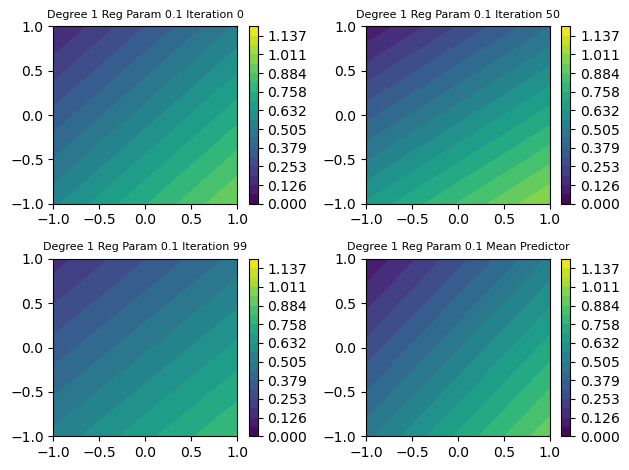

Degree= 1 lambda= 0.1
Bias = 0.2932387532915408
Variance = 0.03370255201970872
MSE = 0.11969151845168585
(100, 10000)


<Figure size 640x480 with 0 Axes>

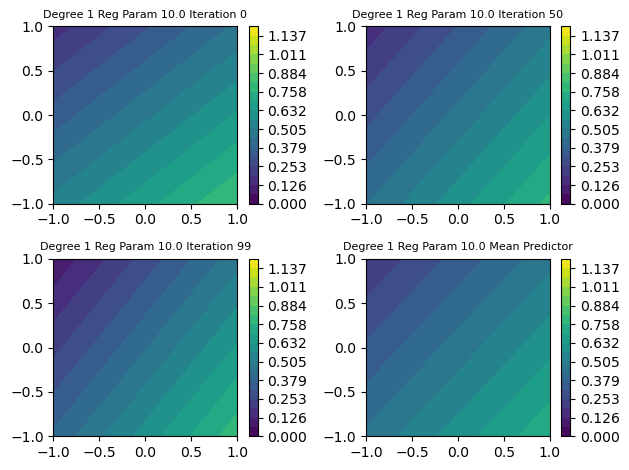

Degree= 1 lambda= 10.0
Bias = 0.2996007770852993
Variance = 0.014840708786374722
MSE = 0.10460133441648993
(100, 10000)


<Figure size 640x480 with 0 Axes>

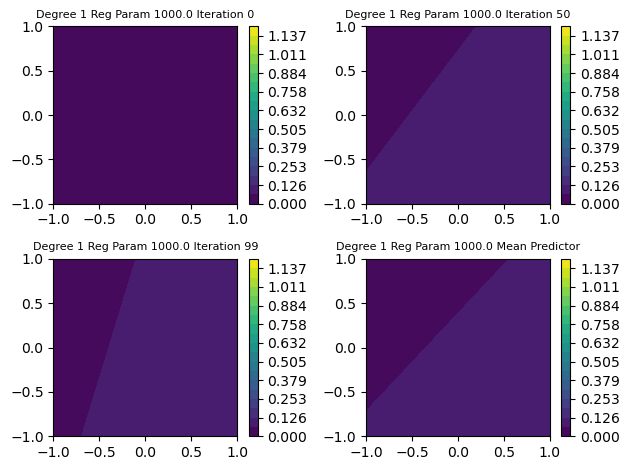

Degree= 1 lambda= 1000.0
Bias = 0.5223731776725773
Variance = 4.8609738275141306e-05
MSE = 0.2729223464900212
(100, 10000)


<Figure size 640x480 with 0 Axes>

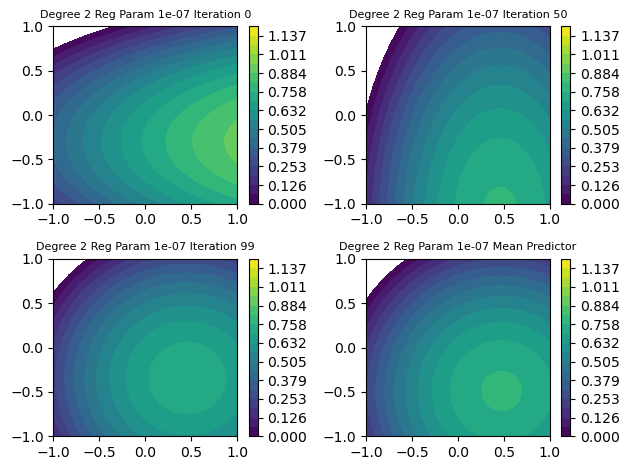

Degree= 2 lambda= 1e-07
Bias = 0.2950434574970316
Variance = 0.046997128791464594
MSE = 0.13404777060326728
(100, 10000)


<Figure size 640x480 with 0 Axes>

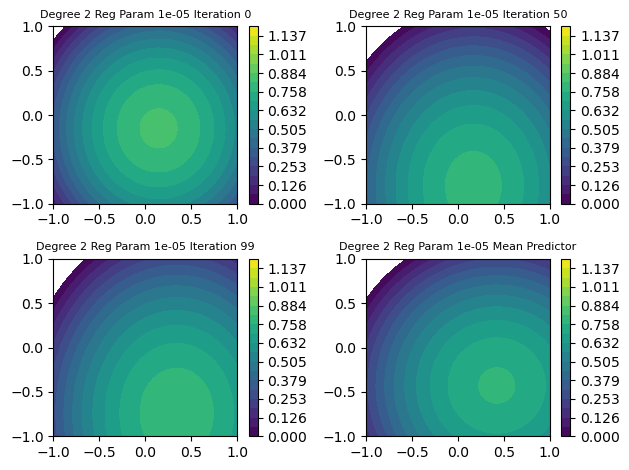

Degree= 2 lambda= 1e-05
Bias = 0.2950639565826353
Variance = 0.04562163365837964
MSE = 0.13268437213257891
(100, 10000)


<Figure size 640x480 with 0 Axes>

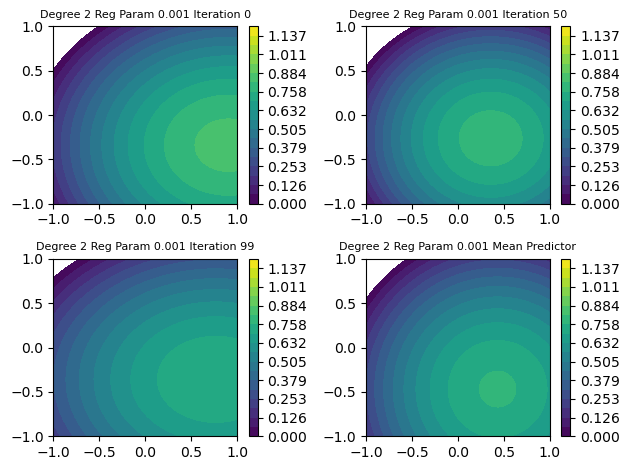

Degree= 2 lambda= 0.001
Bias = 0.29652904757329646
Variance = 0.04767398119948329
MSE = 0.1356034572542096
(100, 10000)


<Figure size 640x480 with 0 Axes>

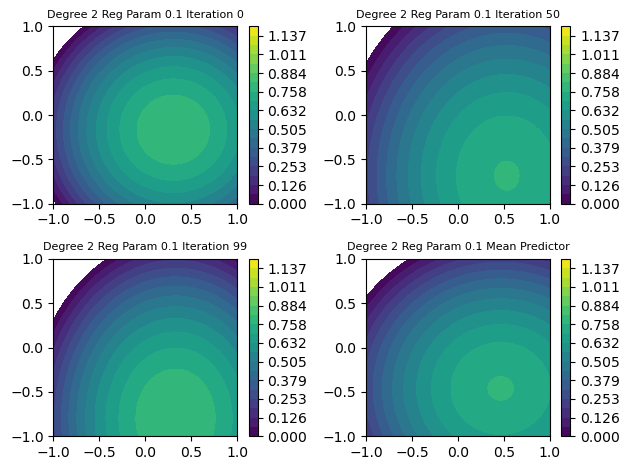

Degree= 2 lambda= 0.1
Bias = 0.29420319823097707
Variance = 0.046943702928158616
MSE = 0.1334992247774942
(100, 10000)


<Figure size 640x480 with 0 Axes>

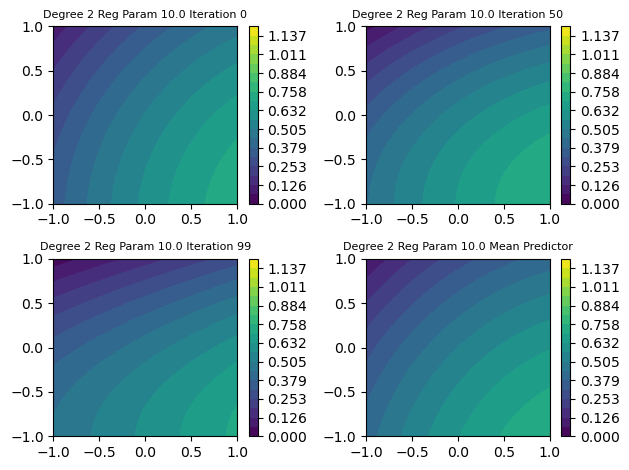

Degree= 2 lambda= 10.0
Bias = 0.2950492196984967
Variance = 0.02288102220315651
MSE = 0.10993506424784827
(100, 10000)


<Figure size 640x480 with 0 Axes>

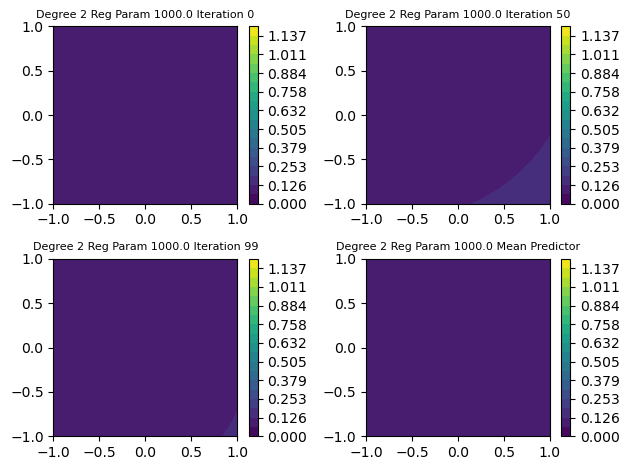

Degree= 2 lambda= 1000.0
Bias = 0.49016125804724847
Variance = 0.00011091230765890483
MSE = 0.24036897119812023
(100, 10000)


<Figure size 640x480 with 0 Axes>

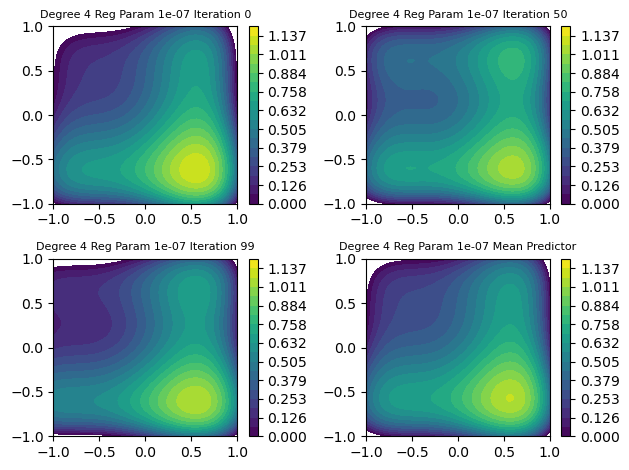

Degree= 4 lambda= 1e-07
Bias = 0.29389876505926205
Variance = 0.06765859049807507
MSE = 0.1540350746014344
(100, 10000)


<Figure size 640x480 with 0 Axes>

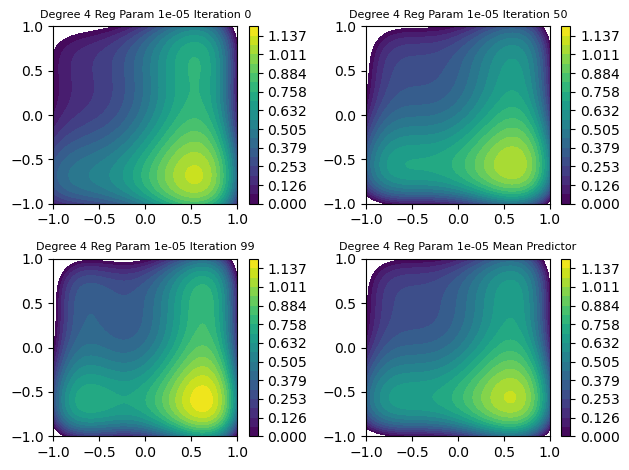

Degree= 4 lambda= 1e-05
Bias = 0.29549015718486826
Variance = 0.0678643994746978
MSE = 0.15517883246783595
(100, 10000)


<Figure size 640x480 with 0 Axes>

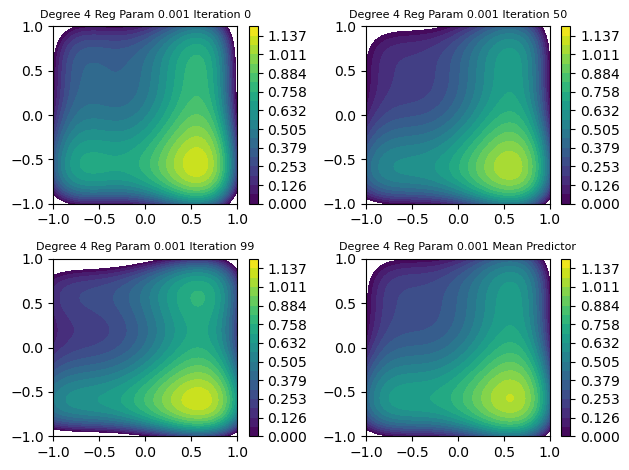

Degree= 4 lambda= 0.001
Bias = 0.2951887088973035
Variance = 0.06844518241540246
MSE = 0.15558155627585943
(100, 10000)


<Figure size 640x480 with 0 Axes>

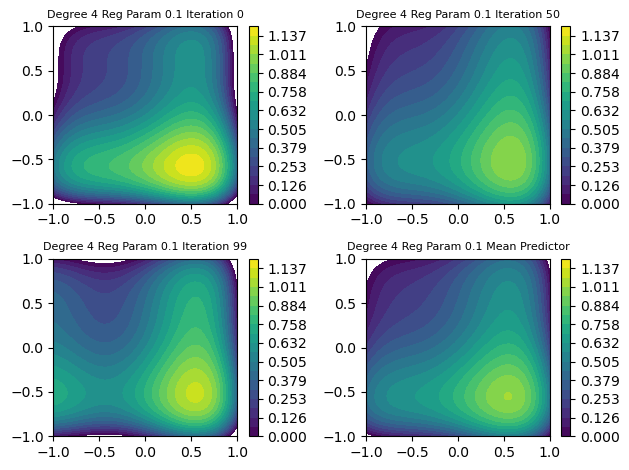

Degree= 4 lambda= 0.1
Bias = 0.29186413833418867
Variance = 0.060606756160278816
MSE = 0.14579143140583722
(100, 10000)


<Figure size 640x480 with 0 Axes>

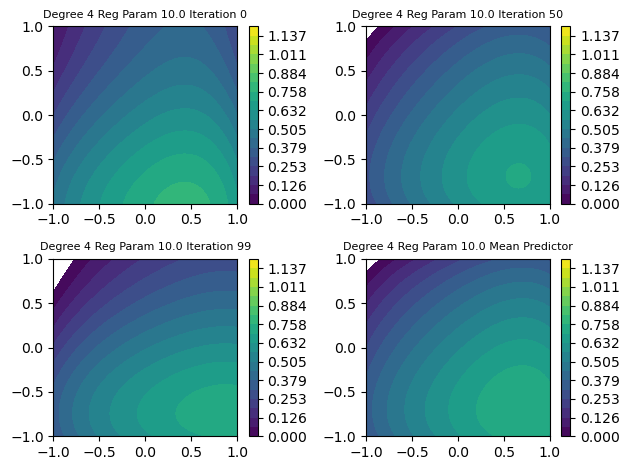

Degree= 4 lambda= 10.0
Bias = 0.3005727283945117
Variance = 0.03340057471955327
MSE = 0.12374453977407418
(100, 10000)


<Figure size 640x480 with 0 Axes>

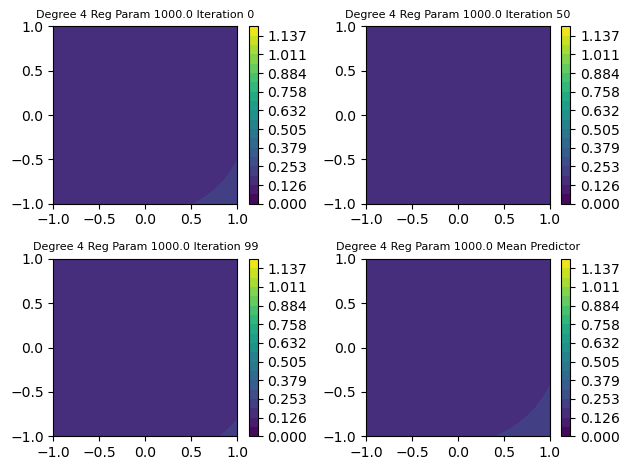

Degree= 4 lambda= 1000.0
Bias = 0.44172178292259323
Variance = 0.0004757667196319327
MSE = 0.1955939002279465
(100, 10000)


<Figure size 640x480 with 0 Axes>

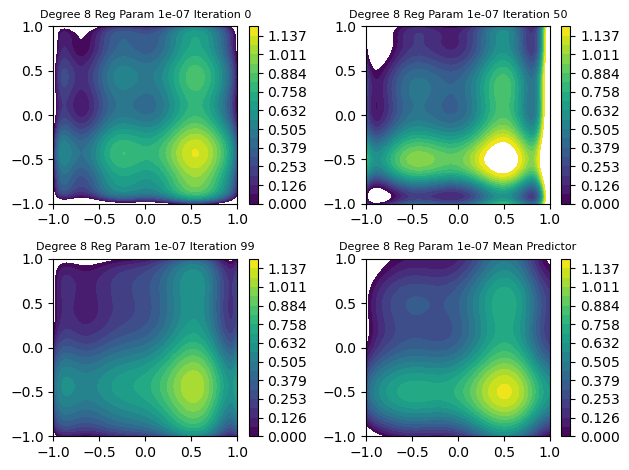

Degree= 8 lambda= 1e-07
Bias = 0.2946587740522429
Variance = 0.07361160431293354
MSE = 0.16043539743890428
(100, 10000)


<Figure size 640x480 with 0 Axes>

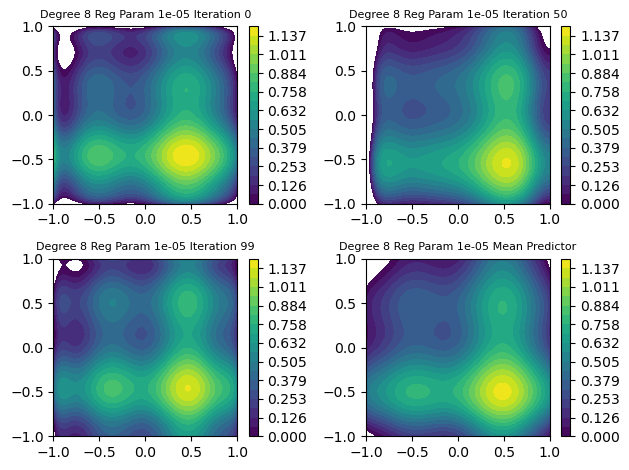

Degree= 8 lambda= 1e-05
Bias = 0.2913417563529866
Variance = 0.07190044292297773
MSE = 0.15678046191782075
(100, 10000)


<Figure size 640x480 with 0 Axes>

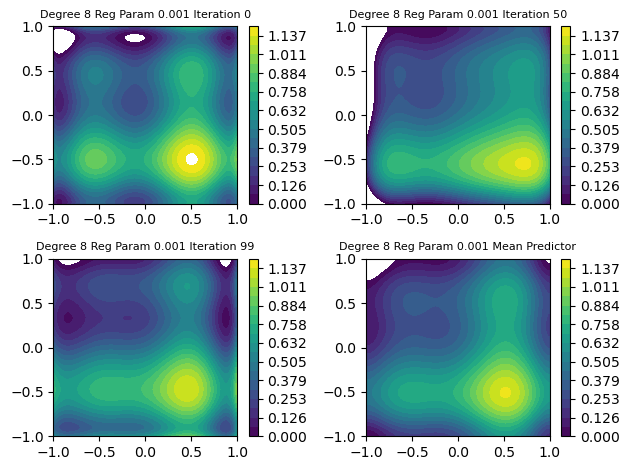

Degree= 8 lambda= 0.001
Bias = 0.2962433585716643
Variance = 0.0732571938403923
MSE = 0.16101732133821195
(100, 10000)


<Figure size 640x480 with 0 Axes>

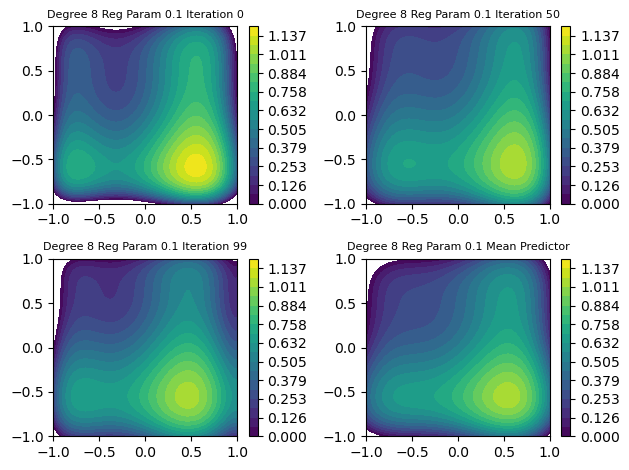

Degree= 8 lambda= 0.1
Bias = 0.2910687626518083
Variance = 0.06446927072878565
MSE = 0.14919029532044037
(100, 10000)


<Figure size 640x480 with 0 Axes>

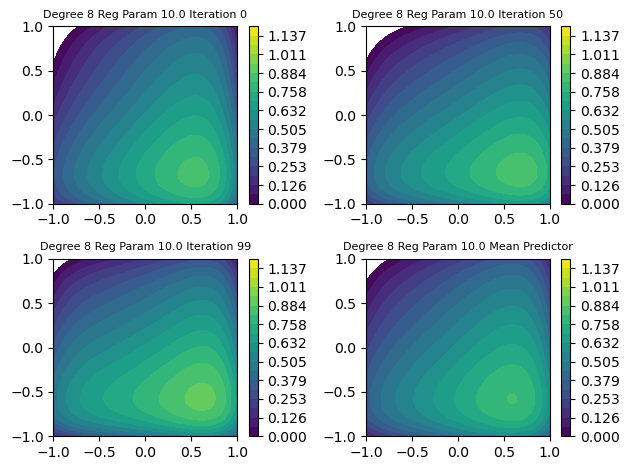

Degree= 8 lambda= 10.0
Bias = 0.29261444539573256
Variance = 0.039835656531615804
MSE = 0.12545887018586796
(100, 10000)


<Figure size 640x480 with 0 Axes>

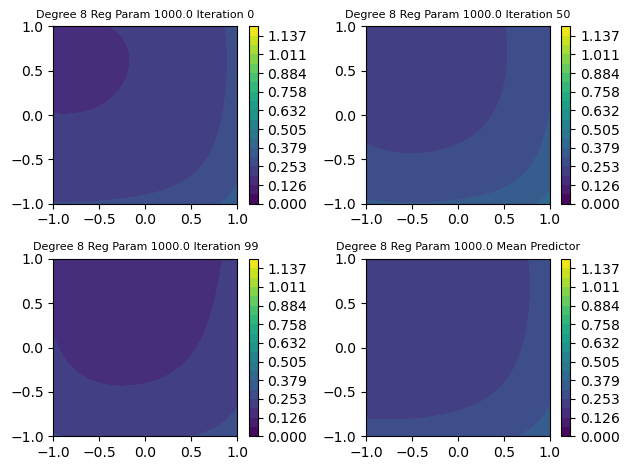

Degree= 8 lambda= 1000.0
Bias = 0.3941669732917409
Variance = 0.0013402542496286848
MSE = 0.15670785708360066
(100, 10000)


<Figure size 640x480 with 0 Axes>

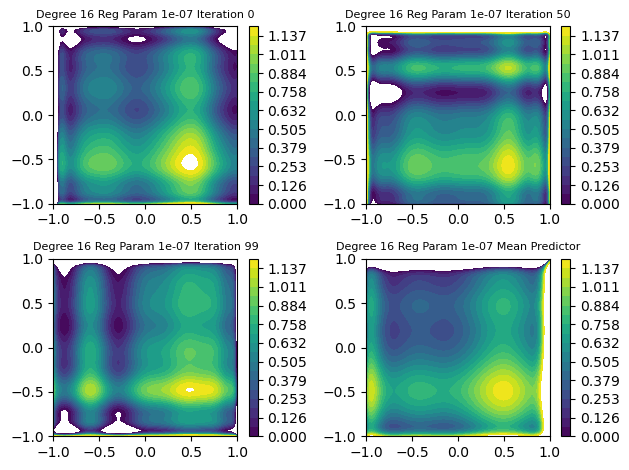

Degree= 16 lambda= 1e-07
Bias = 0.2922982563889189
Variance = 0.0763235919328142
MSE = 0.16176186262081635
(100, 10000)


<Figure size 640x480 with 0 Axes>

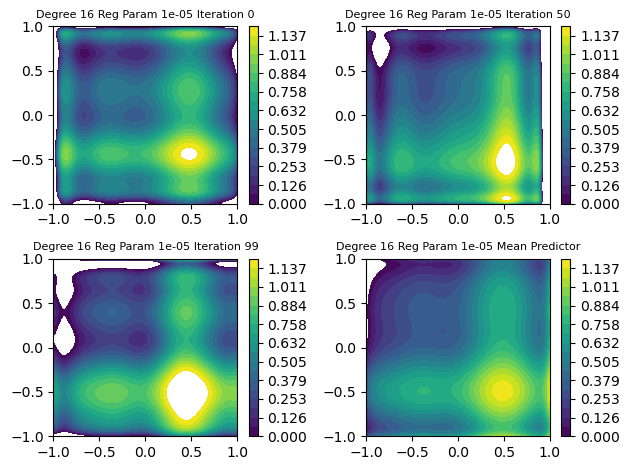

Degree= 16 lambda= 1e-05
Bias = 0.2962163728525347
Variance = 0.0764954678236638
MSE = 0.16423960736957566
(100, 10000)


<Figure size 640x480 with 0 Axes>

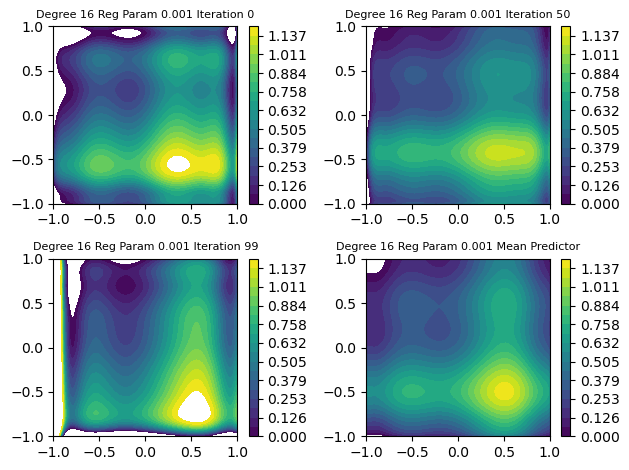

Degree= 16 lambda= 0.001
Bias = 0.28881995366094143
Variance = 0.0700348246878941
MSE = 0.15345179032060247
(100, 10000)


<Figure size 640x480 with 0 Axes>

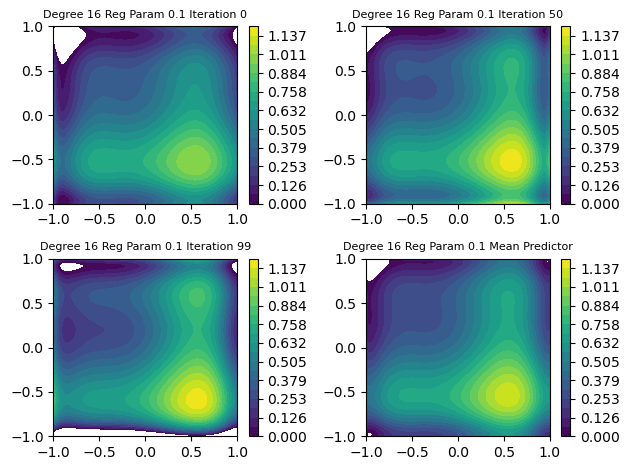

Degree= 16 lambda= 0.1
Bias = 0.29265252265933595
Variance = 0.06784833122340968
MSE = 0.1534938302422828
(100, 10000)


<Figure size 640x480 with 0 Axes>

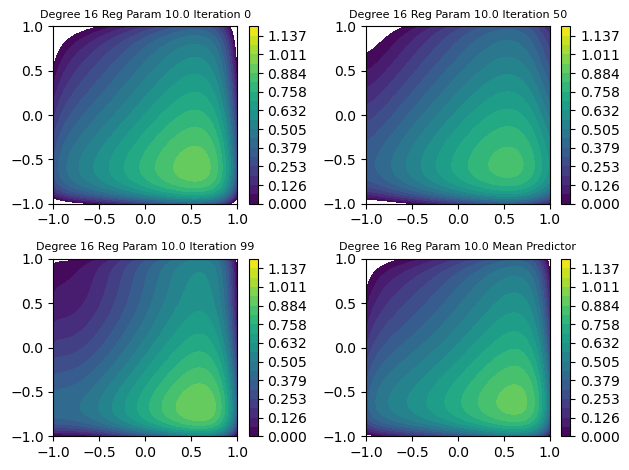

Degree= 16 lambda= 10.0
Bias = 0.2975615051590629
Variance = 0.05293001285266066
MSE = 0.14147286220518768
(100, 10000)


<Figure size 640x480 with 0 Axes>

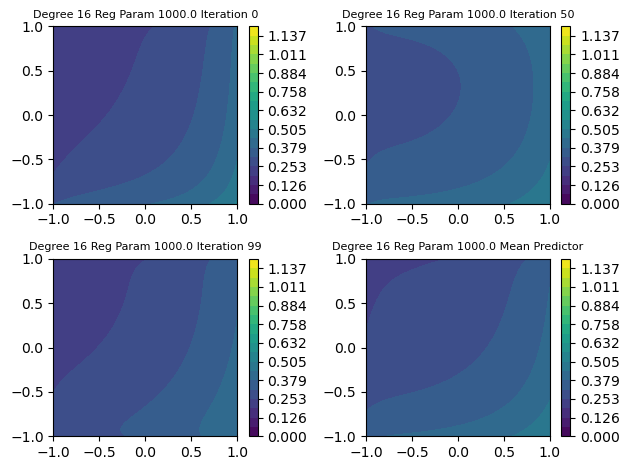

Degree= 16 lambda= 1000.0
Bias = 0.34880364524827406
Variance = 0.003437904618926895
MSE = 0.12510188755741072


In [8]:
# Cell type : CodeWrite

def true_y(X):
    a = np.array((0.5, 0.5))
    b = np.array((-0.5, -0.5))
    c = np.array((0.5, -0.5))
    
    y = np.exp(-4*(np.sum(np.square((X-a)), axis = 1))) + np.exp(-4*(np.sum(np.square((X-b)), axis = 1))) + np.exp(-4*(np.sum(np.square((X-c)), axis = 1)))
    return y
    
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    phi_test = np.ones(X_test.shape[0]).reshape(-1,1)
    
    for i in range(1, degree+1):
        for j in range(i+1):
            phi_test = np.concatenate((phi_test, np.power(X_test[:,0], i-j).reshape(-1,1), np.power(X_test[:,1], j).reshape(-1,1)), axis=1)
    # phi_test = np.unique(phi_test, axis=1)
    Y_test_pred = phi_test @ wt_vector
    
    return Y_test_pred
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    Z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis=1), wt_vector, degree = degree).reshape(X.shape[0], -1)
    # Get Z using other functions
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()

    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi_train = np.ones(X_train.shape[0]).reshape(-1,1)
    for i in range(1, degree + 1):
        for j in range(i+1):
            phi_train = np.concatenate((phi_train, np.power(X_train[:,0], i-j).reshape(-1,1), np.power(X_train[:,1], j).reshape(-1,1)), axis =1)
    # phi_train = np.unique(phi_train, axis=1)
    w = (phi_train.T @ np.linalg.inv(phi_train@phi_train.T + reg_param*np.eye(phi_train.shape[0])))@Y_train
    return w

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    fs_full = []
    fs = []
    Fs = []
    ws = []
    
    for i in range(100):
        X1, X2 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
        X_ = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)
        rand_idxs = np.random.randint(0, 100*100, size=(num_training_samples,))
        X = X_[rand_idxs]
        F_s = true_y(X)
        w_s = polynomial_regression_ridge_train(X, F_s, degree, reg_param)
        f_s = polynomial_regression_ridge_pred(X, w_s, degree)
        f_s_full = polynomial_regression_ridge_pred(X_, w_s, degree)
        fs_full.append(f_s_full)
        fs.append(f_s)
        Fs.append(F_s)
        ws.append(w_s)
        
    fs = np.array(fs)
    Fs = np.array(Fs)
    fs_full = np.array(fs_full)
    print(fs_full.shape)
    
    gs_full = np.mean(fs_full, axis = 0)
    gs = np.mean(fs, axis = 0)
    
    variance = np.mean(np.power((fs - gs), 2))
    bias = np.sqrt(np.mean(np.power((gs - Fs), 2)))
    mse = variance + bias**2
    
    fig, axs = plt.subplots(2,2)
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis=1), ws[0], degree = degree).reshape(X.shape[0], -1)
    ax = axs[0,0].contourf(X,Y, z,levels=np.linspace(0.,1.2 , 20))
    axs[0,0].set_title(f"Degree {degree} Reg Param {reg_param} Iteration 0", fontsize=8)
    plt.colorbar(ax, ax=axs[0,0])
    
    z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis=1), ws[50], degree = degree).reshape(X.shape[0], -1)
    ax = axs[0,1].contourf(X,Y, z,levels=np.linspace(0.,1.2 , 20))
    axs[0,1].set_title(f"Degree {degree} Reg Param {reg_param} Iteration 50", fontsize=8)
    plt.colorbar(ax, ax = axs[0,1])
    
    z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis=1), ws[99], degree = degree).reshape(X.shape[0], -1)
    ax = axs[1,0].contourf(X,Y, z,levels=np.linspace(0.,1.2 , 20))
    axs[1,0].set_title(f"Degree {degree} Reg Param {reg_param} Iteration 99", fontsize=8)
    plt.colorbar(ax, ax = axs[1,0])
    
    z = gs_full.reshape(X.shape[0],-1)
    ax = axs[1,1].contourf(X,Y, z,levels=np.linspace(0.,1.2 , 20))
    axs[1,1].set_title(f"Degree {degree} Reg Param {reg_param} Mean Predictor", fontsize=8)
    plt.colorbar(ax, ax = axs[1,1])
    
    fig.tight_layout()
    plt.show()
    
    return bias, variance, mse
Bias = np.zeros((5,6))
Variance = np.zeros((5,6))

degrees = [1,2,4,8,16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]

for degree in degrees:
    for reg_param in reg_params:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
    
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))


## Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

## Observation:
* From Bias table for different Degrees and Regularization parameter, we can infer:
    * Bias increases with increasing regularization parameter.
    * Bias decreases with increasing degree.
* From Variance table for different Degree and Regularization parameter, we can infer:
    * Variance decreases with increasing regularization parameter.
    * Variance increases with increasing degree.
* From the contour plots, for regularization of 1000 the contour has not much altitude from 0.
### Bias and Variance:

<table>
<tr><th>Bias </th><th>Variance</th></tr>
<tr><td>

|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|-----:|---------:|---------:|---------:|---------:|---------:|---------:|
|**1**| 0.290816 | 0.29587  | 0.291197 | 0.290933 | 0.294861 | 0.518772 |
|**2**| 0.291663 | 0.295016 | 0.293133 | 0.29127  | 0.294136 | 0.491186 |
|**4**| 0.294887 | 0.295926 | 0.291908 | 0.293389 | 0.293104 | 0.443099 |
|**8**| 0.291631 | 0.291851 | 0.294869 | 0.290125 | 0.290091 | 0.392619 |
|**16**| 0.295092 | 0.292824 | 0.292716 | 0.293391 | 0.295647 | 0.3433   |

</td><td>
    
|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|---:|----------:|----------:|----------:|----------:|----------:|------------:|
|**1**| 0.0329652 | 0.0362764 | 0.0341775 | 0.0342638 | 0.0148246 | 4.42782e-05 |
|**2**| 0.0441608 | 0.0478587 | 0.0474903 | 0.0445584 | 0.0212131 | 0.000126774 |
|**4**| 0.0678894 | 0.0686358 | 0.0662452 | 0.060809  | 0.0298166 | 0.000373624 |
|**8**| 0.0718715 | 0.0722389 | 0.0726708 | 0.0632689 | 0.0376178 | 0.00151772  |
|**16**| 0.0777541 | 0.074241  | 0.0723696 | 0.0685855 | 0.05067   | 0.00330697  |



</td></tr> </table>


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




[(2, 10.0), (2, 0.1), (2, 1e-05), (2, 0.1)]


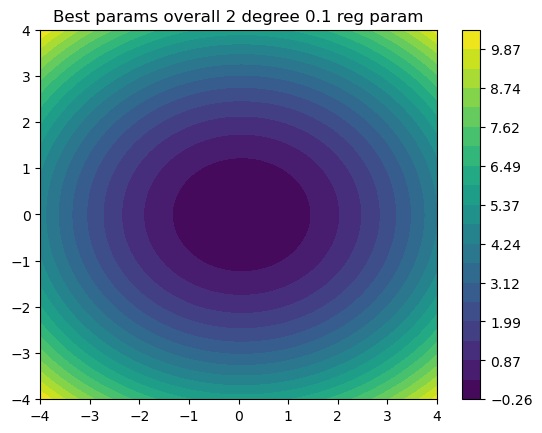

In [9]:
# Cell type : CodeWrite 

with np.load("dataset4_1.npz") as data4:
    X_train4 = data4['arr_0']
    Y_train4 = data4['arr_1']
    X_test4 = data4['arr_2']
    Y_test4 = data4['arr_3']
    
degrees = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def error(X, Y, W, reg, degree):
    phi = np.ones(X.shape[0]).reshape(-1,1)
    
    for i in range(1, degree + 1):
        for j in range(i+1):
            phi = np.concatenate((phi, np.power(X[:,0], i-j).reshape(-1,1), np.power(X[:,1], j).reshape(-1,1)), axis=1)
    # phi = np.unique(phi, axis = 1)
    error = 0.5 * np.sum(np.square((phi@W - Y))) + 0.5*reg*(W @ W[np.newaxis].T)
    return error

train_errors = []
test_errors = []
best_params = []
best_params_train = []

np.random.seed(42)
for i in [50 , 100, 200, 1000]:
    tr_errs = np.zeros((5, 6))
    tst_errs = np.zeros((5,6))
    rand_idxs = np.random.randint(0, X_train4.shape[0], size=(i,))
    X = X_train4[rand_idxs]
    Y = Y_train4[rand_idxs]
    
    for degree in degrees:
        for reg_param in reg_params:
            w = polynomial_regression_ridge_train(X, Y, degree, reg_param)
            tr_errs[degrees.index(degree), reg_params.index(reg_param)] = error(X, Y, w, reg_param, degree)
            tst_errs[degrees.index(degree), reg_params.index(reg_param)] = error(X_test4, Y_test4, w, reg_param, degree)
                
    best_params.append(np.unravel_index(np.argmin(tst_errs, axis=None), tst_errs.shape))
    best_params_train.append(np.unravel_index(np.argmin(tr_errs, axis=None), tr_errs.shape))
    train_errors.append(tr_errs)
    tr_params = np.unravel_index(np.argmin(tr_errs, axis=None), tr_errs.shape)
    test_errors.append(tst_errs)
    #print(tst_errs)

train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

least_test_errors = np.unravel_index(np.argmin(test_errors), test_errors.shape)
best_reg_param = reg_params[least_test_errors[2]]
best_degree = degrees[least_test_errors[1]]

w = polynomial_regression_ridge_train(X_train4, Y_train4, best_degree, best_reg_param)
X,Y = np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4,100))
Z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis=1), w, degree = best_degree).reshape(X.shape[0], -1)

best_params_ = [(degrees[best_params[i][0]], reg_params[best_params[i][1]]) for i in range(len(best_params))]
print(best_params_)

plt.contourf(X, Y,Z,levels=np.linspace(np.min(Z),np.max(Z) , 20))
plt.title(f"Best params overall {best_degree} degree {best_reg_param} reg param")
plt.colorbar()

** Cell type : TextWrite **

## Observations:
* 16 degree and 1e-7 regularization parameter yeilds the least training set error, because this model over fits the given dataset and provides the least training error.
* The best overall parameters are found to be degree 2 and regularization parameter 1e-1.
* From the best parameters for a training size, we can infer that the best degree increases with increase in training data size.
* Best params for different training sizes:
    * For 50: 2 degree and 10 reg param
    * For 100: 2 degree and 1e-1 reg param
    * For 200: 2 degree and 1e-9 reg param
    * For 1000: 2 degree and 1e-9 reg param

## Train and Test Errors:
<table>
<tr><th>Train errors for 50 </th><th>Test errors for 50</th></tr>
<tr><td>

|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|--------:|--------:|--------:|--------:|--------:|--------:|
|**1**| 5.08558 | 5.08558 | 5.08558 | 5.08558 | 5.08629 | 5.13117 |
|**2**| 4.66349 | 4.66349 | 4.66349 | 4.66356 | 4.67067 | 4.9597  |
|**4**| 4.24194 | 4.24194 | 4.24196 | 4.24334 | 4.34507 | 4.7904  |
|**8**| 3.90028 | 3.9003  | 3.90259 | 3.99755 | 4.21318 | 4.61194 |
|**16**| 2.388   | 2.75089 | 3.24585 | 3.86115 | 4.06431 | 4.40966 |

</td><td>
    
|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|--------:|--------:|--------:|--------:|--------:|--------:|
|**1**| 1333.41 | 1333.41 | 1333.41 | 1333.41 | 1333.11 | 1318.83 |
|**2**| 1328    | 1328    | 1328    | 1327.99 | 1326.95 | 1306.05 |
|**4**| 1432.5  | 1432.51 | 1432.5  | 1431.88 | 1391.09 | 1307.4  |
|**8**| 1575.31 | 1575.32 | 1572.84 | 1492.48 | 1420.12 | 1319.1  |
|**16**| 2840.44 | 2121.39 | 1803.15 | 1556.28 | 1451.58 | 1361.37 |


</td></tr> </table>

<table>
<tr><th>Train errors for 100 </th><th>Test errors for 100</th></tr>
<tr><td>

|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|---------:|---------:|---------:|---------:|---------:|---------:|
|**1**| 10.9784  | 10.9784  | 10.9784  | 10.9784  | 10.9784  | 10.9818  |
|**2**|  9.44683 |  9.44683 |  9.44683 |  9.44702 |  9.46627 | 10.3105  |
|**4**|  8.5462  |  8.5462  |  8.5462  |  8.54678 |  8.59867 |  9.65792 |
|**8**|  6.73246 |  6.73259 |  6.74541 |  7.31689 |  8.04648 |  8.95638 |
|**16**|  5.60229 |  5.84076 |  6.05333 |  6.39796 |  7.45865 |  8.41627 |

</td><td>
    
|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|--------:|--------:|--------:|--------:|--------:|--------:|
|**1**| 1323.14 | 1323.14 | 1323.14 | 1323.14 | 1323.13 | 1323.12 |
|**2**| 1234.8  | 1234.8  | 1234.8  | 1234.79 | 1233.79 | 1243.53 |
|**4**| 1396.3  | 1396.3  | 1396.3  | 1396.12 | 1380.44 | 1235.97 |
|**8**| 1630.87 | 1630.82 | 1627.35 | 1521.36 | 1456.59 | 1305.6  |
|**16**| 1913.87 | 1669.44 | 1727.88 | 1715.65 | 1513.82 | 1399.41 |

</td></tr> </table>

<table>
<tr><th>Train errors for 200 </th><th>Test errors for 200</th></tr>
<tr><td>

|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|--------:|--------:|--------:|--------:|--------:|--------:|
|**1**| 22.9385 | 22.9385 | 22.9385 | 22.9385 | 22.939  | 22.9846 |
|**2**| 22.0109 | 22.0109 | 22.0109 | 22.011  | 22.0171 | 22.408  |
|**4**| 20.5477 | 20.5477 | 20.5477 | 20.548  | 20.5803 | 21.6223 |
|**8**| 19.4367 | 19.4367 | 19.439  | 19.6009 | 20.4273 | 20.9548 |
|**16**| 16.7808 | 17.8602 | 18.8286 | 19.1042 | 19.7681 | 20.6673 |

</td><td>
    
|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|--------:|--------:|--------:|--------:|--------:|--------:|
|**1**| 1330.38 | 1330.38 | 1330.38 | 1330.38 | 1330.33 | 1326.38 |
|**2**| 1239.05 | 1239.05 | 1239.05 | 1239.06 | 1239.29 | 1260.32 |
|**4**| 1303.15 | 1303.18 | 1303.18 | 1303.15 | 1300.07 | 1248.01 |
|**8**| 1380.7  | 1380.72 | 1380.45 | 1363.25 | 1306.01 | 1274.51 |
|**16**| 1546.12 | 1440.82 | 1410.59 | 1400.16 | 1348.76 | 1286.63 |

</td></tr> </table>

<table>
<tr><th>Train errors for 1000 </th><th>Test errors for 1000</th></tr>
<tr><td>

|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|---------:|---------:|---------:|---------:|---------:|---------:|
|**1**| 111.442  | 111.442  | 111.442  | 111.442  | 111.443  | 111.524  |
|**2**| 101.23   | 101.23   | 101.23   | 101.23   | 101.242  | 102.357  |
|**4**|  99.1174 |  99.1174 |  99.1174 |  99.1177 |  99.1413 | 100.252  |
|**8**|  96.2531 |  96.2531 |  96.2538 |  96.3183 |  97.1036 |  99.0029 |
|**16**|  92.2396 |  92.7589 |  94.0111 |  95.4633 |  96.2735 |  98.0571 |

</td><td>
    
|Degrees\Reg_param|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|--:|--------:|--------:|--------:|--------:|--------:|--------:|
|**1**| 1336.9  | 1336.91 | 1336.91 | 1336.91 | 1336.89 | 1335.52 |
|**2**| 1243.81 | 1243.86 | 1243.86 | 1243.86 | 1243.85 | 1244.12 |
|**4**| 1265.05 | 1265.09 | 1265.09 | 1265.09 | 1264.67 | 1253.17 |
|**8**| 1291.42 | 1291.28 | 1291.27 | 1290.12 | 1280.44 | 1263.32 |
|**16**| 1318.07 | 1313.65 | 1299.37 | 1294.14 | 1288.45 | 1267.75 |
</td></tr> </table>


** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










============================ 4 points =========================


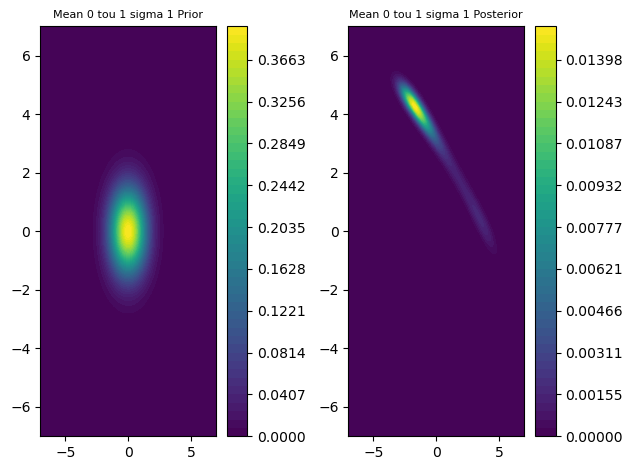

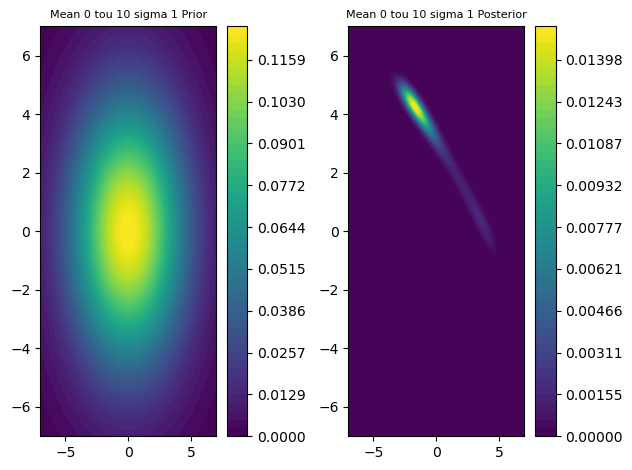

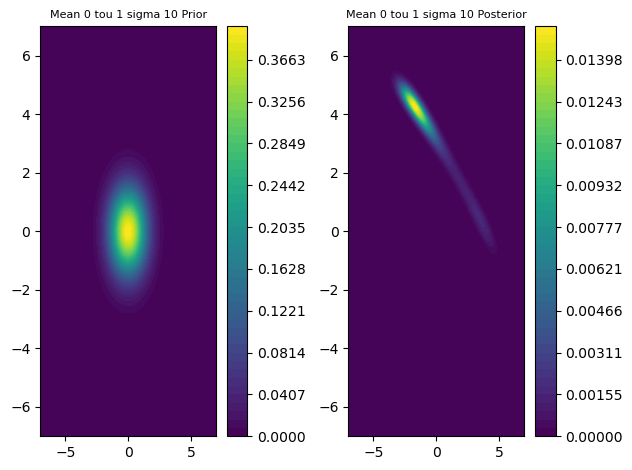

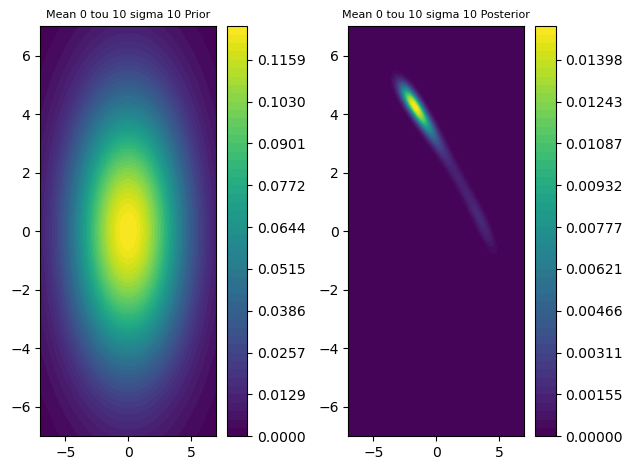

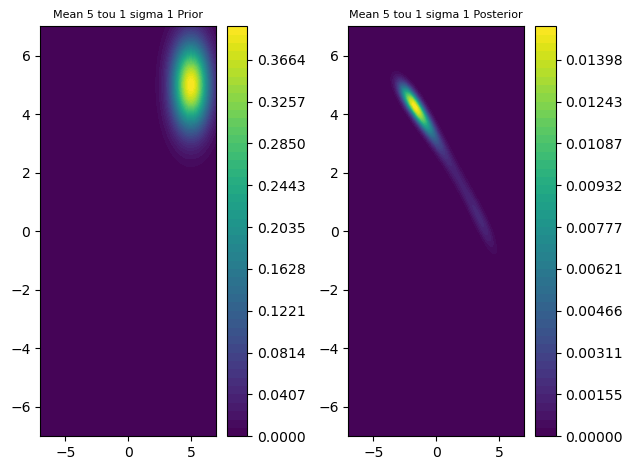

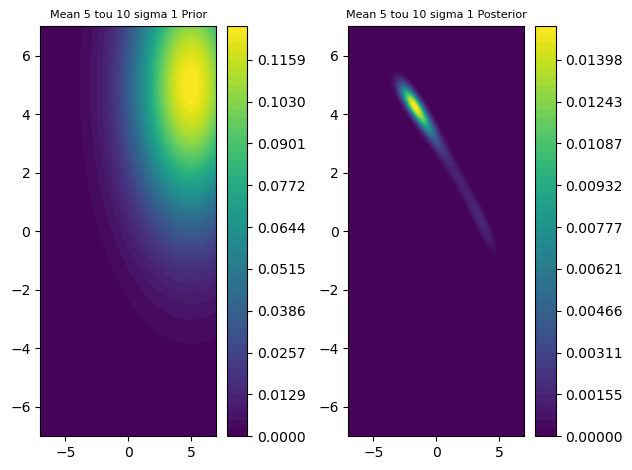

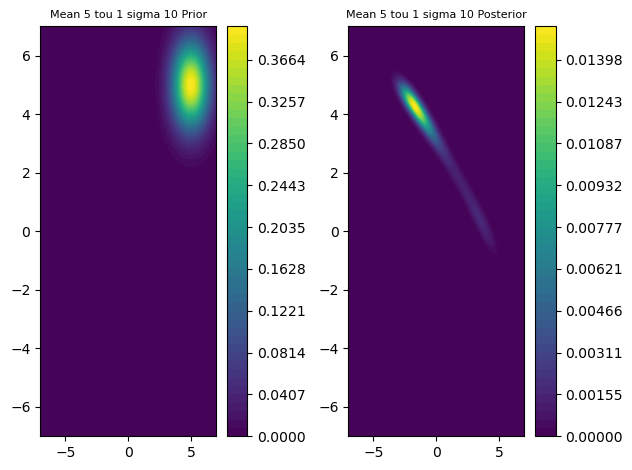

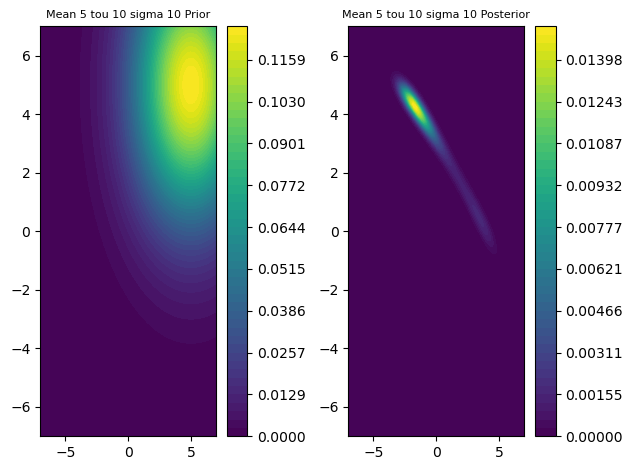

============================ 400 points =========================


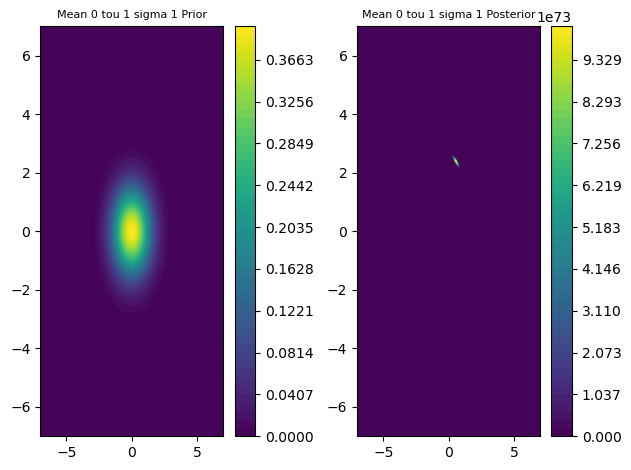

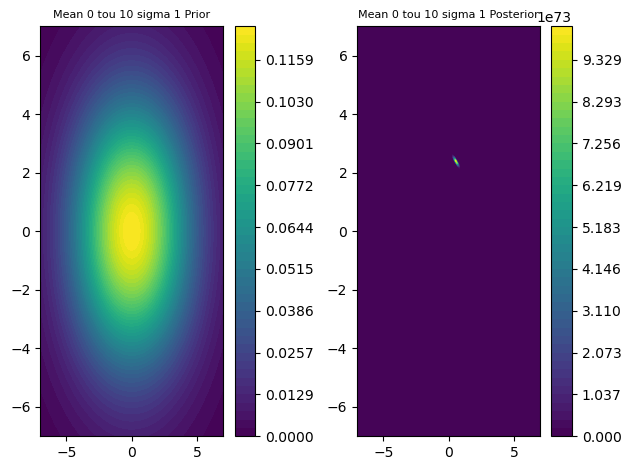

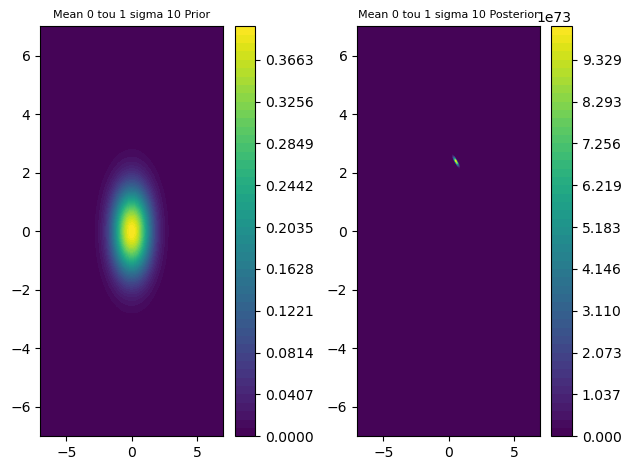

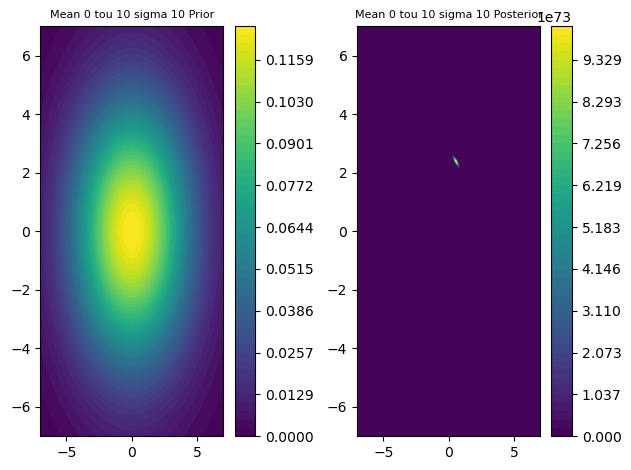

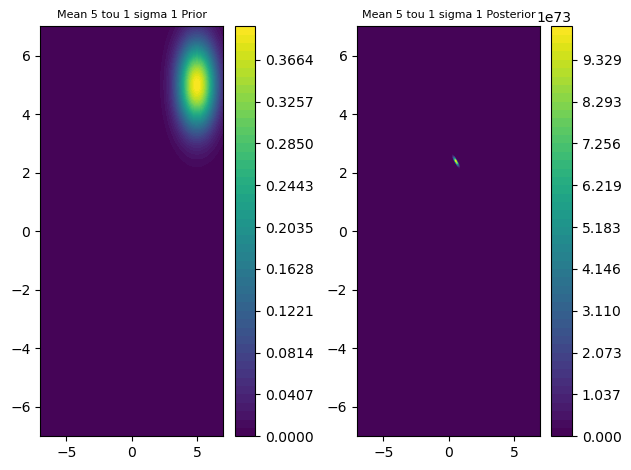

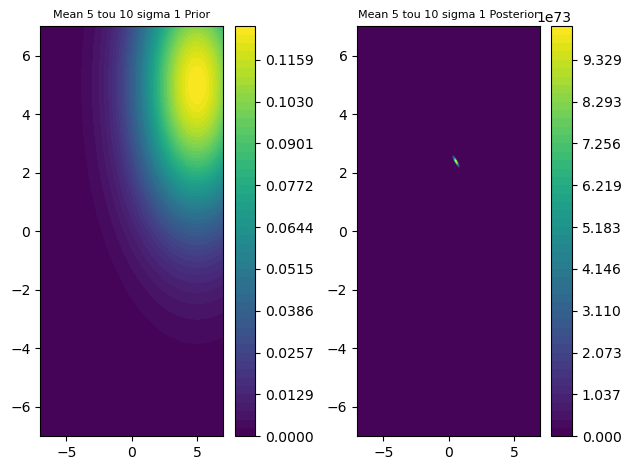

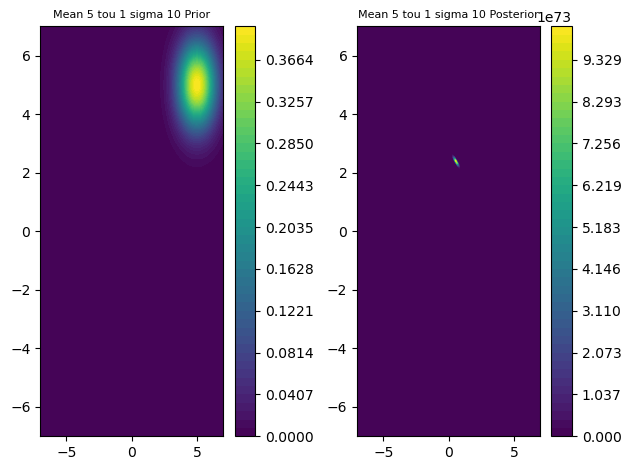

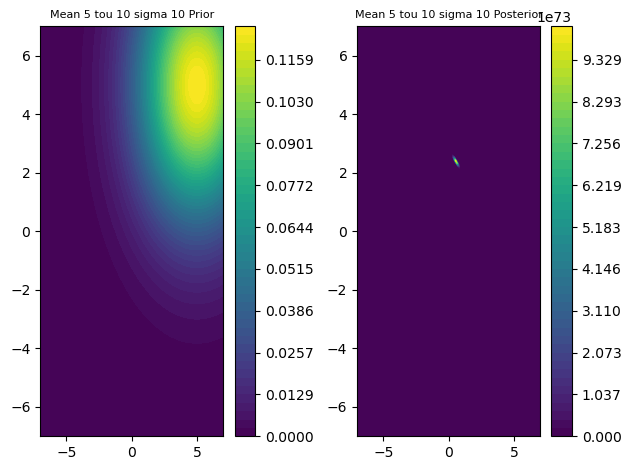

In [10]:
# Cell type : CodeWrite 
import math

means = [0, 0, 0, 0, 5, 5, 5, 5]
tou_sq = [1, 10, 1, 10, 1, 10, 1, 10]
sigma_sq  = [1, 1, 10, 10, 1, 1, 10, 10]

X_train = np.array(
    [[1.0, 2.0],
     [2.0, 2.1],
     [0.6, 1.5],
     [1.1, 0.9]])

Y_train = np.array([5.1, 6.1, 4.2, 2.9])

def prior(mean, tou_):
    x,y = np.meshgrid(np.linspace(-7,7,400), np.linspace(-7,7,400))
    w_ = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
    
    mean_ = np.array([mean, mean])
    cov = tou_ * np.eye(mean_.shape[0])
    
    PW = []
    for i in range(w_.shape[0]):
        PW.append((1/math.sqrt(2*math.pi*tou_)) * np.exp(-0.5 * (w_[i] - mean_) @ np.linalg.inv(cov) @ (w_[i] - mean_)[np.newaxis].T))
    PW = np.array(PW)
    
    z = PW.reshape(x.shape[0], -1)
    return z

def posterior(X, Y, mean, tou_, sigma_):
    x,y = np.meshgrid(np.linspace(-7,7,400), np.linspace(-7,7,400))
    w_ = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
    
    PY_WX = 1
    for i in range(Y.shape[0]):
        PY_WX = (1/math.sqrt(2*math.pi*sigma_)) * np.exp((-0.5 / sigma_ )*np.square((Y[i] - w_@X[i]))) * PY_WX
        
    mean_ = np.array([mean, mean])
    w_sq = np.square(w_ - mean_)
    PW_X = (1/math.sqrt(2*math.pi*tou_))*(np.exp(-0.5 * (w_sq[:,0] * w_sq[:,1])/tou_))
    PY_X = 0.25**Y.shape[0]
    z = PY_WX * PW_X/PY_X   
    return z.reshape(x.shape[0], -1)
    
X_train100 = X_train
Y_train100 = Y_train
             
for i in range(99):
    X_train100 = np.vstack((X_train100, X_train))
    Y_train100 = np.hstack((Y_train100, Y_train))

x,y = np.meshgrid(np.linspace(-7,7,400), np.linspace(-7,7,400))
X_ = [X_train, X_train100]
Y_ = [Y_train, Y_train100]

for j in range(len(X_)):
    print(f"============================ {X_[j].shape[0]} points =========================")
    for i in range(len(means)):
        fig, axs = plt.subplots(1,2)
    
        z = prior(means[i], tou_sq[i])
        level = np.max(z)
        if level == 0:
            level = 1
        ax = axs[0].contourf(x,y,z,levels=np.linspace(0.,level, 50))
        axs[0].set_title(f"Mean {means[i]} tou {tou_sq[i]} sigma {sigma_sq[i]} Prior", fontsize=8)
        plt.colorbar(ax, ax = axs[0])
        
        z = posterior(X_[j], Y_[j], 5, 10, 1)
        level = np.max(z)
        if level == 0:
            level = 1
        ax = axs[1].contourf(x,y,z,levels=np.linspace(0.,level, 50))
        axs[1].set_title(f"Mean {means[i]} tou {tou_sq[i]} sigma {sigma_sq[i]} Posterior", fontsize=8)
        plt.colorbar(ax, ax = axs[1])
    
        fig.tight_layout()
        plt.show()
        print("=======================================================================")
    


** Cell type : TextWrite **

## Observations:
* Prior is a multivariate normal distribution with the given mean and covariance matrix.
* Posterior distribution has low variance compared to the prior distribution and concentrated around the Weight vector that we will obtain from training.
* Posterior distribution for 400 points is more concentrated than 4 point dataset, after seeing a lot of data the model becomes more confident on the Weight vector. 
* Posterior distribution looks same from any prior with the given number of data points.